In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
use_cuda = torch.cuda.is_available()
use_mps = torch.backends.mps.is_available()
device = torch.device("cuda" if use_cuda else "mps" if use_mps else "cpu")
device

device(type='mps')

In [3]:
torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_mps else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
                        transforms.Resize((28, 28)),
                        transforms.RandomRotation((-15., 15.), fill=0),
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)

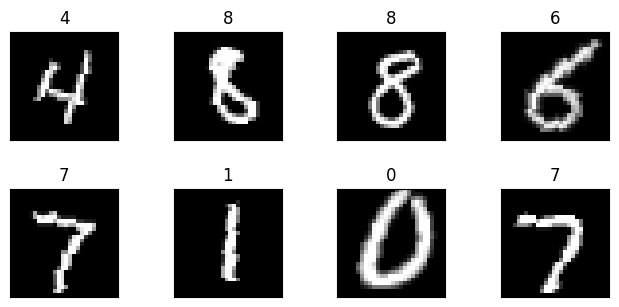

In [4]:
from utils import return_dataset_images

return_dataset_images(train_loader, 8)

In [5]:
from model import Net, model_summary, model_train, model_test

model = Net(device).to(device)
model_summary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
              ReLU-2           [-1, 16, 28, 28]               0
           Dropout-3           [-1, 16, 28, 28]               0
       BatchNorm2d-4           [-1, 16, 28, 28]              32
            Conv2d-5           [-1, 16, 28, 28]           2,320
              ReLU-6           [-1, 16, 28, 28]               0
           Dropout-7           [-1, 16, 28, 28]               0
       BatchNorm2d-8           [-1, 16, 28, 28]              32
            Conv2d-9           [-1, 16, 28, 28]           2,320
             ReLU-10           [-1, 16, 28, 28]               0
        MaxPool2d-11           [-1, 16, 14, 14]               0
           Conv2d-12           [-1, 16, 12, 12]           2,320
             ReLU-13           [-1, 16, 12, 12]               0
          Dropout-14           [-1, 16,

In [6]:
model = Net(device).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=12, gamma=0.1, verbose=True)

criterion = F.nll_loss

for epoch in range(1, 20):
    model_train(model, device, train_loader, optimizer, criterion)
    model_test(model, device, test_loader, criterion)
    scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.


Train: Loss=0.1400 Batch_id=468 Accuracy=87.42: 100%|██████████| 469/469 [00:09<00:00, 50.19it/s]



Test set: Average loss: 0.0564, Accuracy: 9829/10000 (98.29%)

Adjusting learning rate of group 0 to 1.0000e-02.


Train: Loss=0.0443 Batch_id=468 Accuracy=97.67: 100%|██████████| 469/469 [00:08<00:00, 54.55it/s]



Test set: Average loss: 0.0452, Accuracy: 9862/10000 (98.62%)

Adjusting learning rate of group 0 to 1.0000e-02.


Train: Loss=0.0383 Batch_id=468 Accuracy=98.13: 100%|██████████| 469/469 [00:08<00:00, 54.47it/s]



Test set: Average loss: 0.0348, Accuracy: 9899/10000 (98.99%)

Adjusting learning rate of group 0 to 1.0000e-02.


Train: Loss=0.1005 Batch_id=468 Accuracy=98.45: 100%|██████████| 469/469 [00:08<00:00, 55.91it/s]



Test set: Average loss: 0.0253, Accuracy: 9919/10000 (99.19%)

Adjusting learning rate of group 0 to 1.0000e-02.


Train: Loss=0.1252 Batch_id=468 Accuracy=98.55: 100%|██████████| 469/469 [00:08<00:00, 55.45it/s]



Test set: Average loss: 0.0254, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-02.


Train: Loss=0.0018 Batch_id=468 Accuracy=98.65: 100%|██████████| 469/469 [00:08<00:00, 56.09it/s]



Test set: Average loss: 0.0276, Accuracy: 9901/10000 (99.01%)

Adjusting learning rate of group 0 to 1.0000e-02.


Train: Loss=0.0071 Batch_id=468 Accuracy=98.75: 100%|██████████| 469/469 [00:08<00:00, 54.17it/s]



Test set: Average loss: 0.0217, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-02.


Train: Loss=0.0616 Batch_id=468 Accuracy=98.81: 100%|██████████| 469/469 [00:08<00:00, 56.27it/s]



Test set: Average loss: 0.0235, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 1.0000e-02.


Train: Loss=0.0434 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:08<00:00, 55.37it/s]



Test set: Average loss: 0.0243, Accuracy: 9932/10000 (99.32%)

Adjusting learning rate of group 0 to 1.0000e-02.


Train: Loss=0.0056 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:08<00:00, 53.88it/s]



Test set: Average loss: 0.0195, Accuracy: 9933/10000 (99.33%)

Adjusting learning rate of group 0 to 1.0000e-02.


Train: Loss=0.0180 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:08<00:00, 55.93it/s]



Test set: Average loss: 0.0175, Accuracy: 9941/10000 (99.41%)

Adjusting learning rate of group 0 to 1.0000e-02.


Train: Loss=0.0088 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:08<00:00, 55.41it/s]



Test set: Average loss: 0.0202, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 1.0000e-03.


Train: Loss=0.0042 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [00:08<00:00, 55.74it/s]



Test set: Average loss: 0.0151, Accuracy: 9951/10000 (99.51%)

Adjusting learning rate of group 0 to 1.0000e-03.


Train: Loss=0.0064 Batch_id=468 Accuracy=99.30: 100%|██████████| 469/469 [00:08<00:00, 56.07it/s]



Test set: Average loss: 0.0146, Accuracy: 9960/10000 (99.60%)

Adjusting learning rate of group 0 to 1.0000e-03.


Train: Loss=0.0047 Batch_id=468 Accuracy=99.31: 100%|██████████| 469/469 [00:08<00:00, 56.05it/s]



Test set: Average loss: 0.0147, Accuracy: 9954/10000 (99.54%)

Adjusting learning rate of group 0 to 1.0000e-03.


Train: Loss=0.0171 Batch_id=468 Accuracy=99.34: 100%|██████████| 469/469 [00:08<00:00, 55.78it/s]



Test set: Average loss: 0.0146, Accuracy: 9956/10000 (99.56%)

Adjusting learning rate of group 0 to 1.0000e-03.


Train: Loss=0.0076 Batch_id=468 Accuracy=99.34: 100%|██████████| 469/469 [00:08<00:00, 55.77it/s]



Test set: Average loss: 0.0146, Accuracy: 9954/10000 (99.54%)

Adjusting learning rate of group 0 to 1.0000e-03.


Train: Loss=0.0097 Batch_id=468 Accuracy=99.33: 100%|██████████| 469/469 [00:08<00:00, 56.05it/s]



Test set: Average loss: 0.0146, Accuracy: 9951/10000 (99.51%)

Adjusting learning rate of group 0 to 1.0000e-03.


Train: Loss=0.0044 Batch_id=468 Accuracy=99.40: 100%|██████████| 469/469 [00:08<00:00, 56.10it/s]



Test set: Average loss: 0.0143, Accuracy: 9954/10000 (99.54%)

Adjusting learning rate of group 0 to 1.0000e-03.


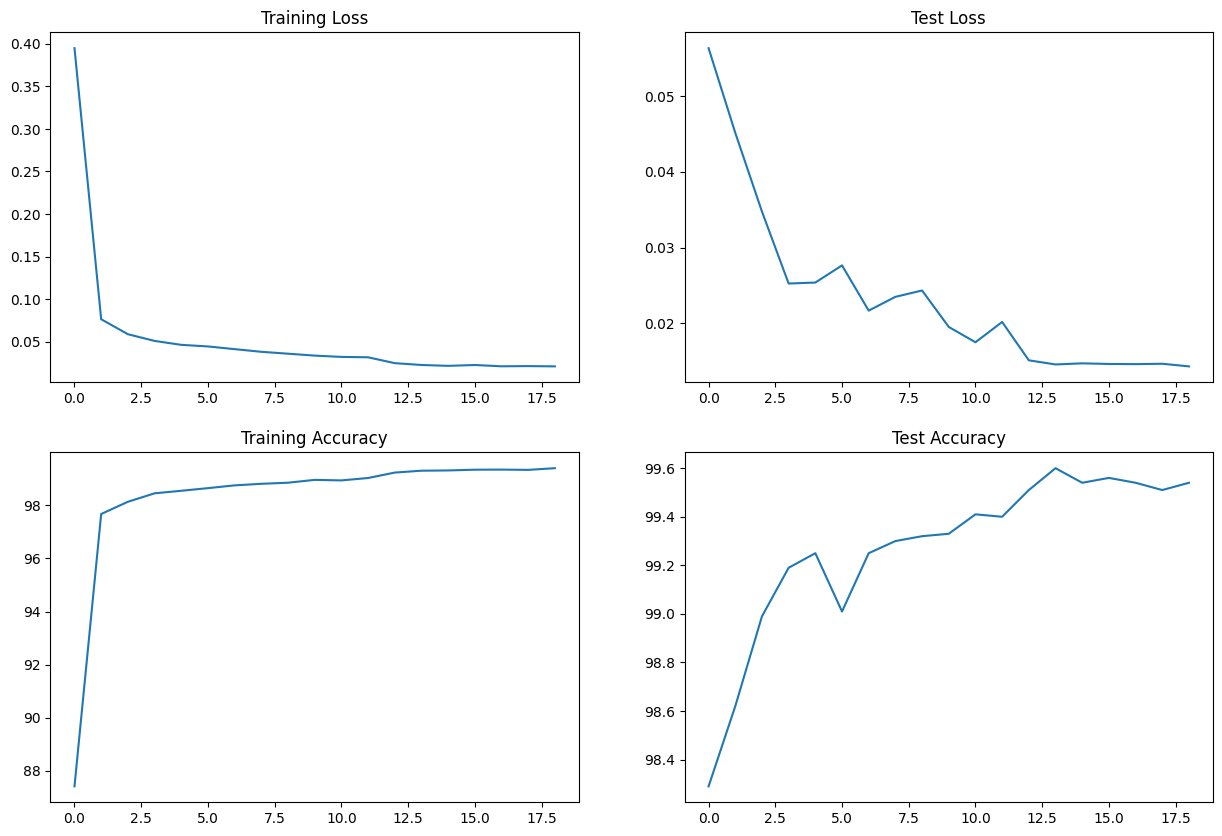

In [7]:
from model import draw_graphs

draw_graphs()